In [1]:
import pandas as pd  
from sklearn.model_selection import train_test_split 
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.layers import Dense, Dropout,Input

In [2]:
data = pd.read_csv("d:\\jupyter\\chronic\\kidney_disease.csv")
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [8]:
DATANULL=data.isnull().sum()
print(f"تعداد ستون‌های خالی: {DATANULL}")


تعداد ستون‌های خالی: id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [7]:
data.shape

(400, 26)

In [7]:
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [8]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [9]:
data.groupby('rbc').size()

rbc
abnormal     47
normal      201
dtype: int64

<Axes: ylabel='Frequency'>

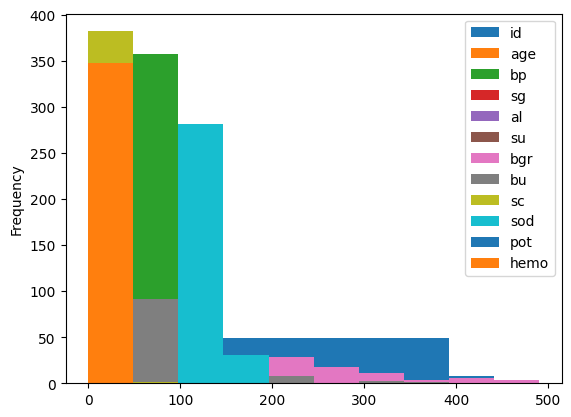

In [10]:
data.plot.hist()

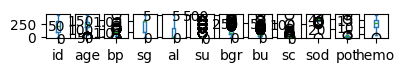

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

myFilename="d:\\jupyter\\chronic\\kidney_disease.csv"
names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin', 'BMI','DiabetesPedigreeFunction','Age','Outcome']
myData=pd.read_csv(myFilename)
myData.plot(kind='box',subplots=True,layout=(27,27),sharex=False, sharey=False,figsize=(10,10))
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
##label_encoder = LabelEncoder()
##data['normal'] = label_encoder.fit_transform(data['normal'])  
X = data[:,0:25]
Y = data[:,25]
mydataScaler = MinMaxScaler(feature_range = (0, 1))
mydataRescaled = mydataScaler.fit_transform(X)
set_printoptions(precision = 3)
print(mydataRescaled[20:26,:])

InvalidIndexError: (slice(None, None, None), slice(0, 25, None))

In [22]:
data = data.ffill()



numeric_columns = ['age', 'bp', 'sg', 'al', 'su', 'pcv', 'wc', 'rc']
for column in numeric_columns:
  data[column] = pd.to_numeric(data[column], errors='coerce')

data = data.dropna()

X = data.drop(['classification', 'id'], axis=1)
Y = data['classification']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from keras.layers import Dropout

model = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(16, activation='relu'),
    Dropout(0.5), 
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=50, batch_size=10, validation_split=0.3)

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("دقت مدل روی داده‌های تست:", test_accuracy)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5002 - loss: 0.8493 - val_accuracy: 0.4255 - val_loss: 0.7130
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5080 - loss: 0.7064 - val_accuracy: 0.6702 - val_loss: 0.5643
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7105 - loss: 0.5579 - val_accuracy: 0.8511 - val_loss: 0.4685
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7359 - loss: 0.5292 - val_accuracy: 0.9362 - val_loss: 0.3972
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7150 - loss: 0.4492 - val_accuracy: 0.9681 - val_loss: 0.3445
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7923 - loss: 0.3829 - val_accuracy: 0.9681 - val_loss: 0.3001
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8551 - loss: 0.3358 - val_accuracy: 0.9681 - val_loss: 0.2620
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8453 - loss: 0.2941 - val_accuracy: 0.9681 - val_los

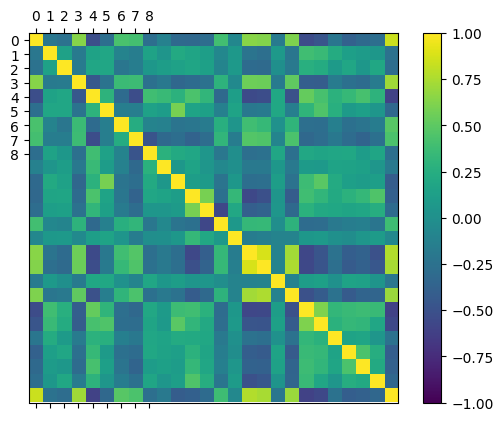

In [13]:
correlations =data.corr()

myfig = plt.figure()
axis = myfig.add_subplot(111) 

cax = axis.matshow(correlations, vmin =-1, vmax = 1)
myfig.colorbar(cax)
ticks = np.arange(0, 9, 1) 
axis.set_xticks(ticks)
axis.set_yticks(ticks)
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

df = pd.read_csv("d:\\jupyter\\chronic\\kidney_disease.csv")

df['rbc'] = df['rbc'].apply(lambda x: 1 if x == 'present' else (0 if x == 'notpresent' else x))
df['pc'] = df['pc'].apply(lambda x: 1 if x == 'present' else (0 if x == 'notpresent' else x))

df['pc'] = df['pc'].apply(lambda x: 1 if x == 'abnormal' else (0 if x == 'normal' else x))


label_encoder = LabelEncoder()
df['classification'] = label_encoder.fit_transform(df['classification'].astype(str))

X = df.drop(columns=['classification'])  
y = df['classification'] 

for column in X.columns:
    if X[column].dtype == 'object':
        print(f"Column '{column}' has text values. Converting to numeric...")
        X[column] = LabelEncoder().fit_transform(X[column])
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(X_pca)


Column 'rbc' has text values. Converting to numeric...
Column 'pcc' has text values. Converting to numeric...
Column 'ba' has text values. Converting to numeric...
Column 'pcv' has text values. Converting to numeric...
Column 'wc' has text values. Converting to numeric...
Column 'rc' has text values. Converting to numeric...
Column 'htn' has text values. Converting to numeric...
Column 'dm' has text values. Converting to numeric...
Column 'cad' has text values. Converting to numeric...
Column 'appet' has text values. Converting to numeric...
Column 'pe' has text values. Converting to numeric...
Column 'ane' has text values. Converting to numeric...
[[ 2.62235508e-01  1.40790170e+00]
 [ 7.95839841e-01  8.69168621e-02]
 [-3.14694435e+00  2.64268657e+00]
 [-4.76605259e+00 -1.87469923e+00]
 [-1.50023310e-01 -1.23988042e-01]
 [-1.52995229e+00  9.29094852e-01]
 [-9.00344779e-01  1.05208785e+00]
 [-2.27723967e+00  1.96191817e+00]
 [-3.31633275e+00 -7.93718896e-01]
 [-4.30720510e+00 -3.1916225

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 95.83%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42) 

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42) 

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 99.17%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 99.17%


In [ ]:
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 4. ایجاد مدل SVM
svm = SVC(kernel='linear', random_state=42) 

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 97.50%
